### Setting up Data



In [1]:
# Import tools
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler as SS

In [2]:
# read dataset into memory as dataframe
dataset = pd.read_csv('dataset.csv')
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# Demonstrates that there are no empty values in the dataset
dataset.isna().sum()

: 

In [4]:
# import tools
from sklearn.model_selection import train_test_split as tts
dataset.drop(dataset[dataset["Target"]=="Enrolled"].index,inplace=True)


# ALL FEATURES
X = dataset.drop(['Target'], axis = 1).to_numpy()

# FIRST ASSUMPTIONS
# separate data into X (features) and y (target)
# X = dataset.drop(['Target',
#                   'GDP',
#                   'Inflation rate',
#                   'Unemployment rate',
#                   'Curricular units 2nd sem (evaluations)',
#                   'Curricular units 1st sem (without evaluations)',
#                   'Educational special needs',
#                   'International',
#                   'Nacionality',
#                  ], axis = 1).to_numpy()

# AFTER FEATURE IMPORTANCES - INCLUDING PLATEAU
# separate data into X (features) and y (target)
X = dataset.drop(['Target',
                  'Marital status',
                  'Application order',
                  'Daytime/evening attendance',
                  'Previous qualification',
                  'Nacionality',
                  'Displaced',
                  'Educational special needs',
                  'Debtor',
                  'Gender',
                  'International',
                  'Curricular units 1st sem (credited)',
                  'Curricular units 1st sem (without evaluations)',
                  'Curricular units 2nd sem (credited)',
                  'Curricular units 2nd sem (without evaluations)'
                 ], axis = 1).to_numpy()

# AFTER FEATURE IMPORTANCES - NOT INCLUDING PLATEAU
# separate data into X (features) and y (target)
# X = dataset.drop(['Target',
#                   'Marital status',
#                   'Application mode',
#                   'Application order',
#                   'Daytime/evening attendance',
#                   'Previous qualification',
#                   'Nacionality',
#                   'Mother\'s qualification',
#                   'Father\'s qualification',
#                   'Displaced',
#                   'Educational special needs',
#                   'Debtor',
#                   'Gender',
#                   'International',
#                   'Curricular units 1st sem (credited)',
#                   'Curricular units 1st sem (enrolled)',
#                   'Curricular units 1st sem (without evaluations)',
#                   'Curricular units 2nd sem (credited)',
#                   'Curricular units 2nd sem (enrolled)',
#                   'Curricular units 2nd sem (without evaluations)',
#                   'Unemployment rate',
#                   'Inflation rate',
#                   'GDP',
#                  ], axis = 1).to_numpy()



y = dataset['Target'].to_numpy()

# train/test split
X_tr, X_te, y_tr, y_te = tts(X, y, test_size = 0.2, random_state = 256)

std_scaler = SS()
Xs_te = std_scaler.fit_transform(X_te)

In [30]:
names = dataset.columns[:-1].values
print(names)

['Marital status' 'Application mode' 'Application order' 'Course'
 'Daytime/evening attendance' 'Previous qualification' 'Nacionality'
 "Mother's qualification" "Father's qualification" "Mother's occupation"
 "Father's occupation" 'Displaced' 'Educational special needs' 'Debtor'
 'Tuition fees up to date' 'Gender' 'Scholarship holder'
 'Age at enrollment' 'International' 'Curricular units 1st sem (credited)'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)' 'Curricular units 1st sem (grade)'
 'Curricular units 1st sem (without evaluations)'
 'Curricular units 2nd sem (credited)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)' 'Curricular units 2nd sem (grade)'
 'Curricular units 2nd sem (without evaluations)' 'Unemployment rate'
 'Inflation rate' 'GDP']


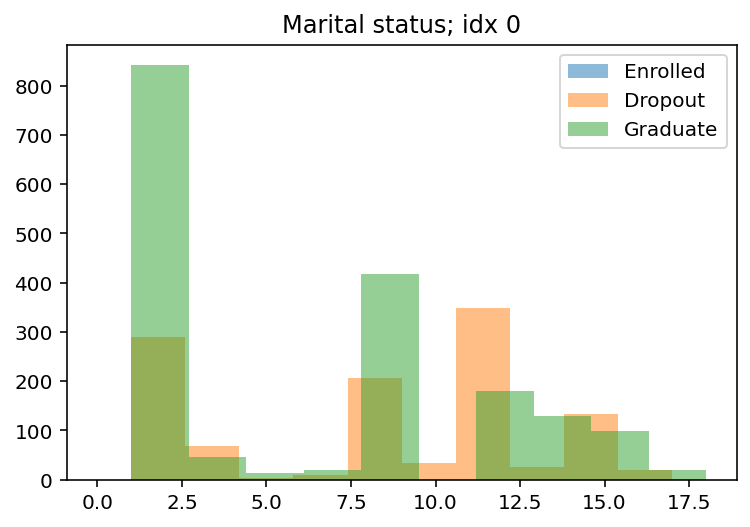

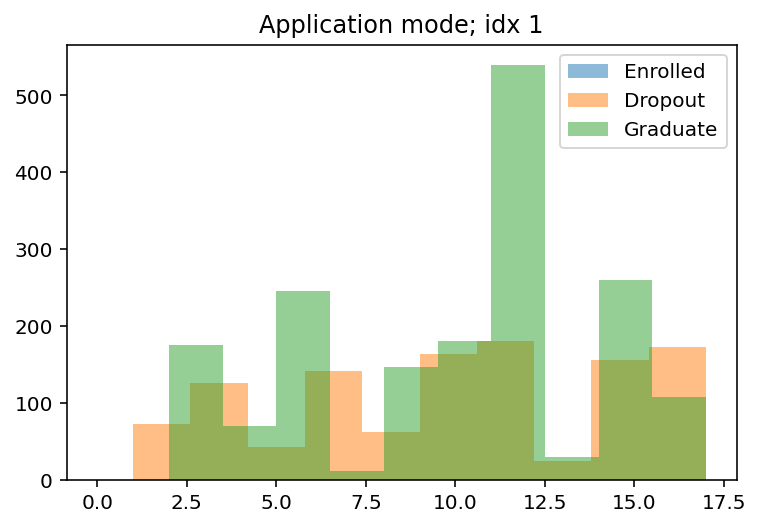

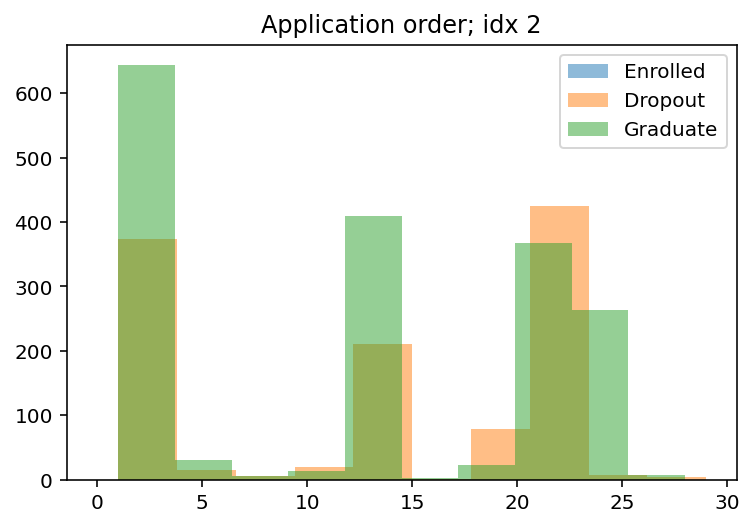

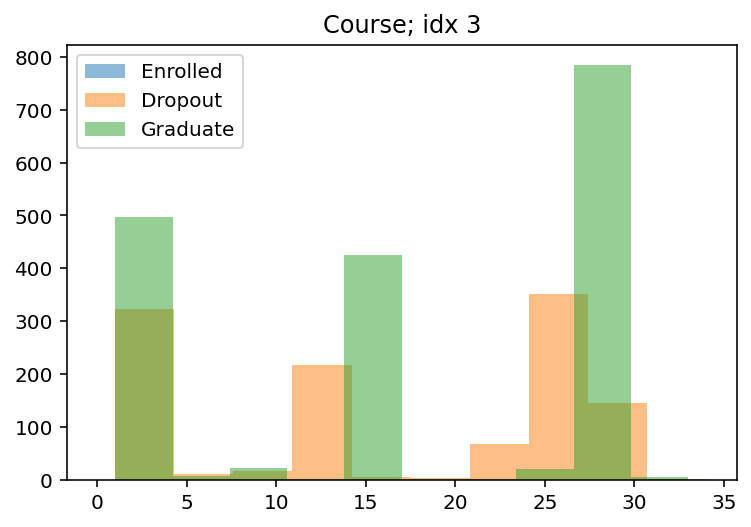

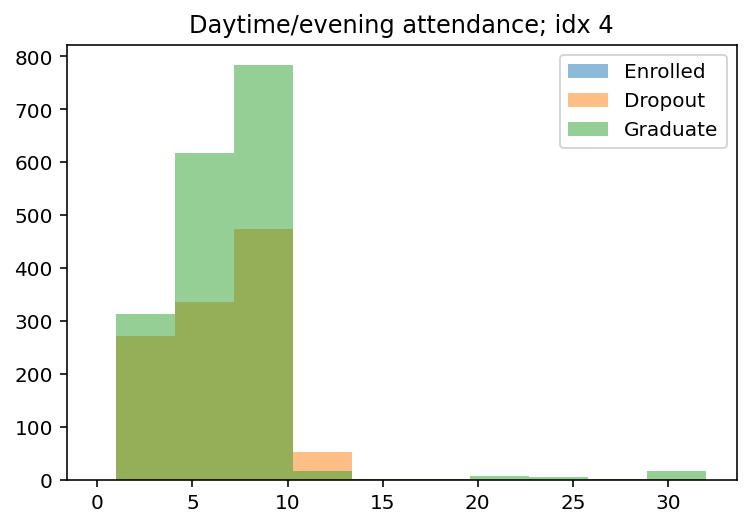

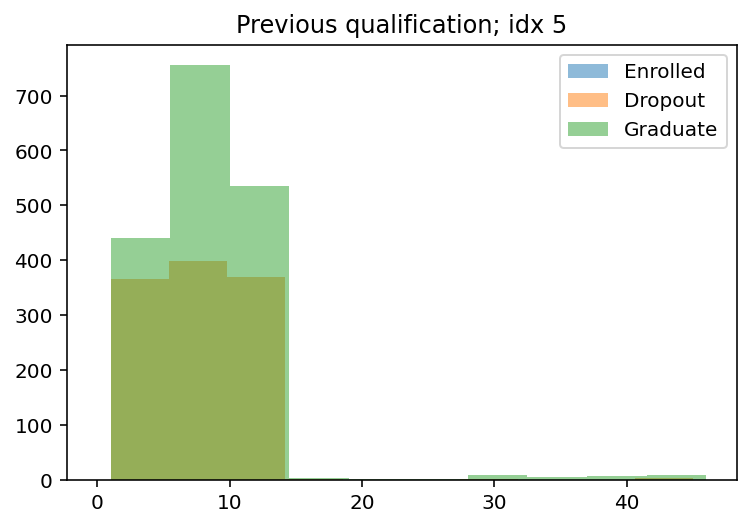

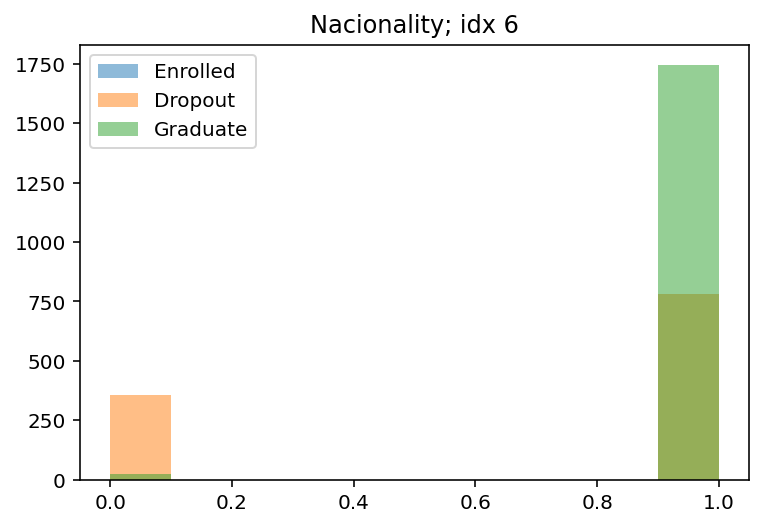

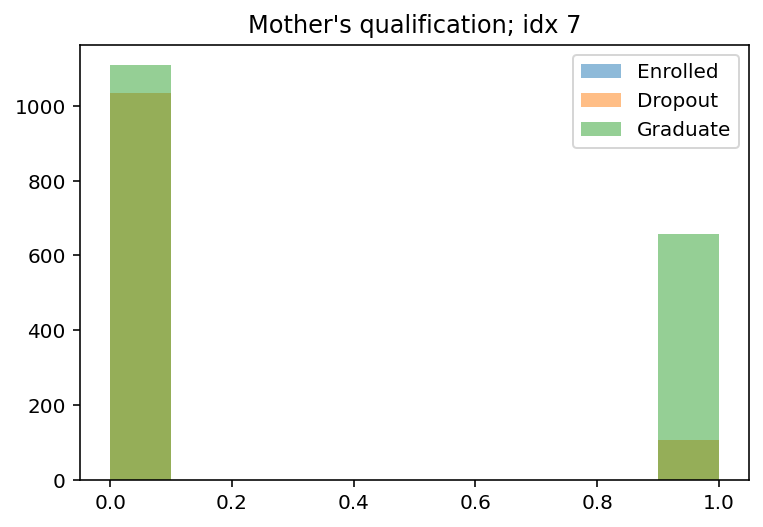

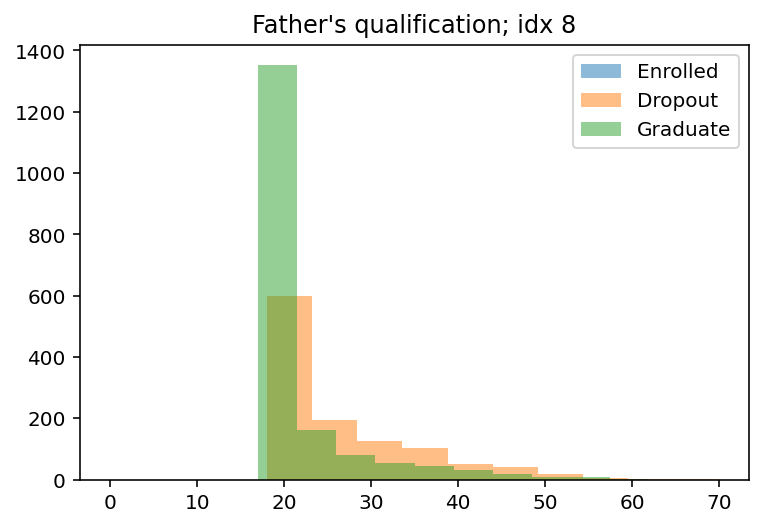

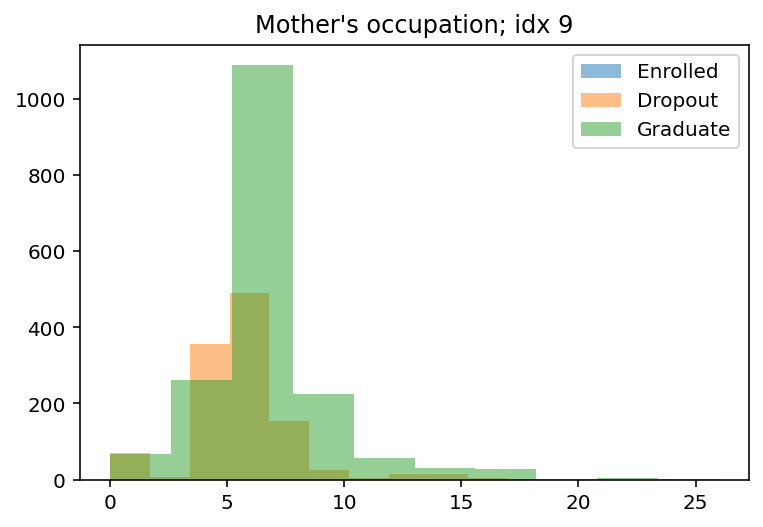

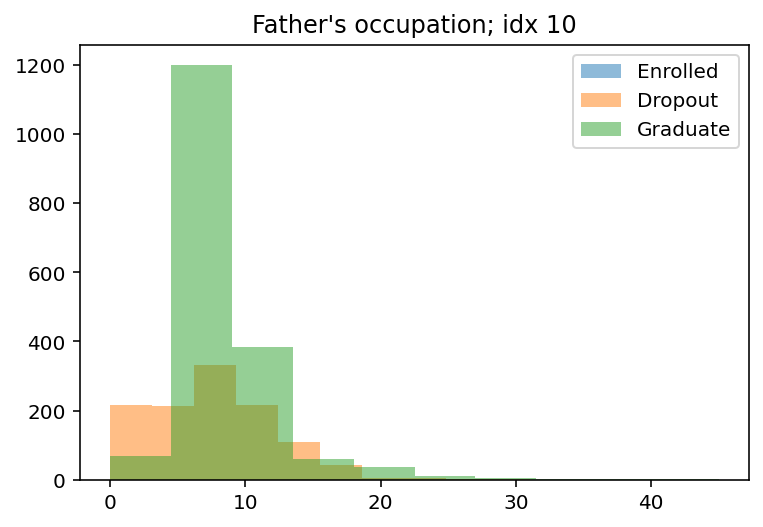

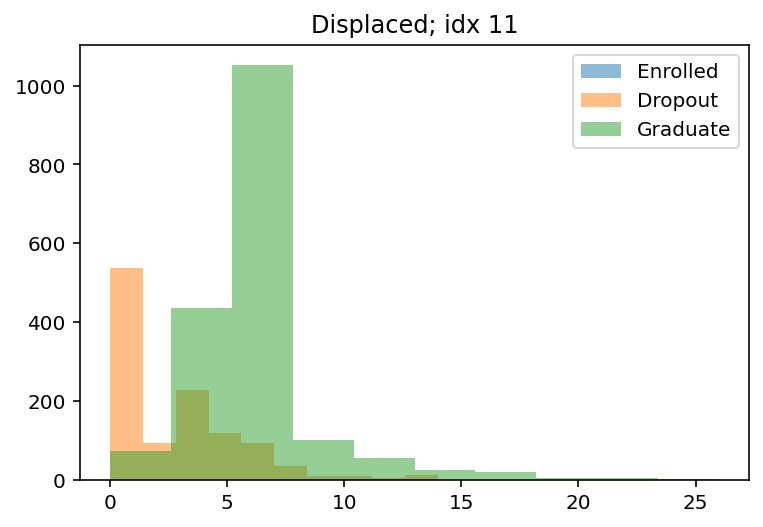

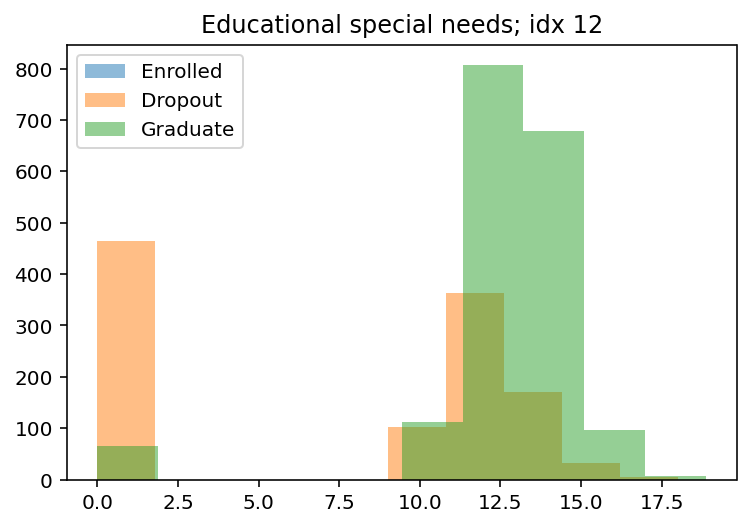

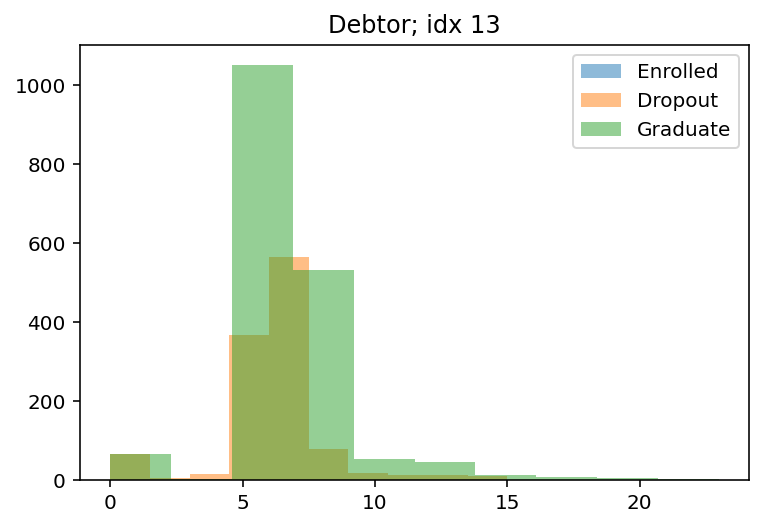

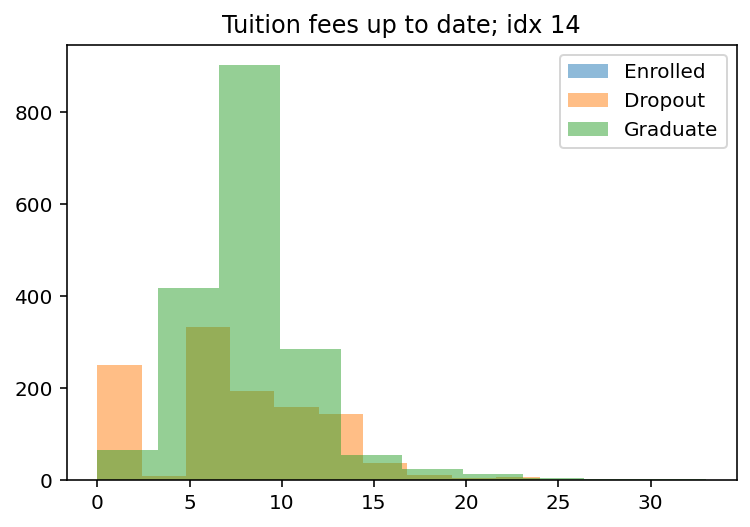

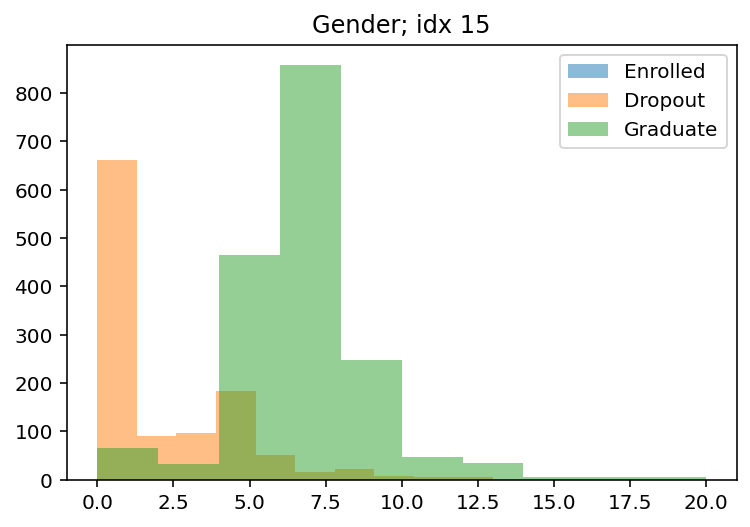

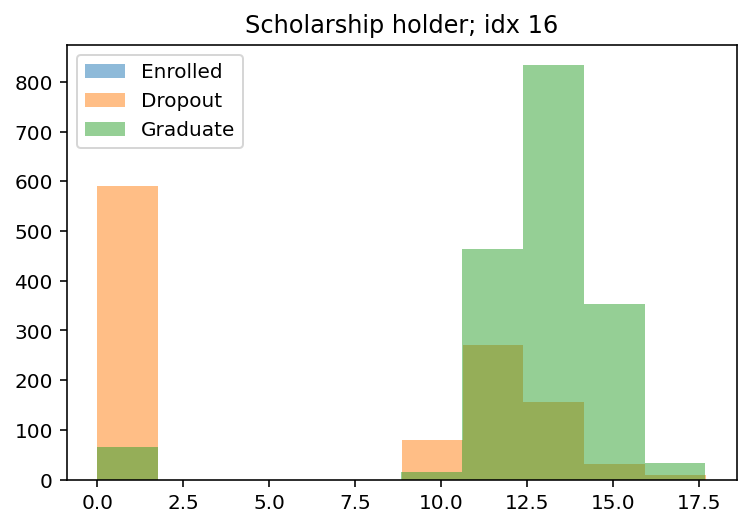

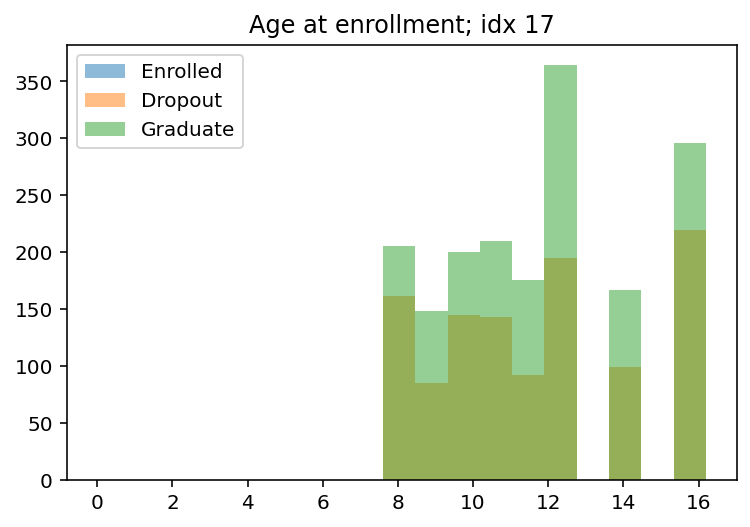

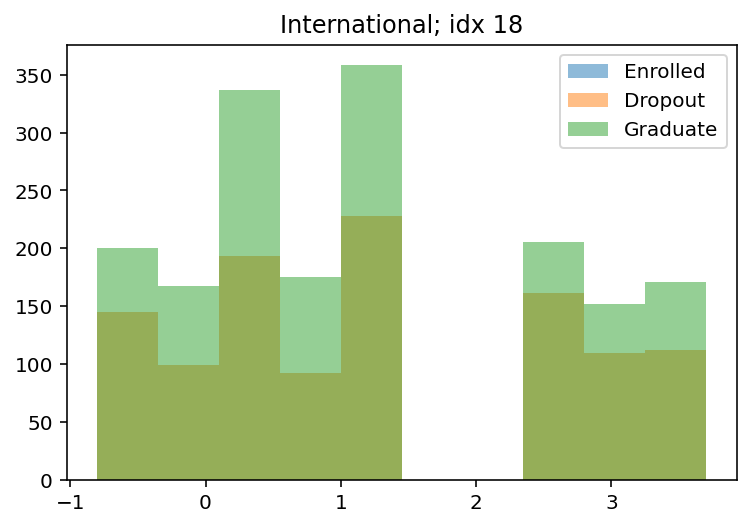

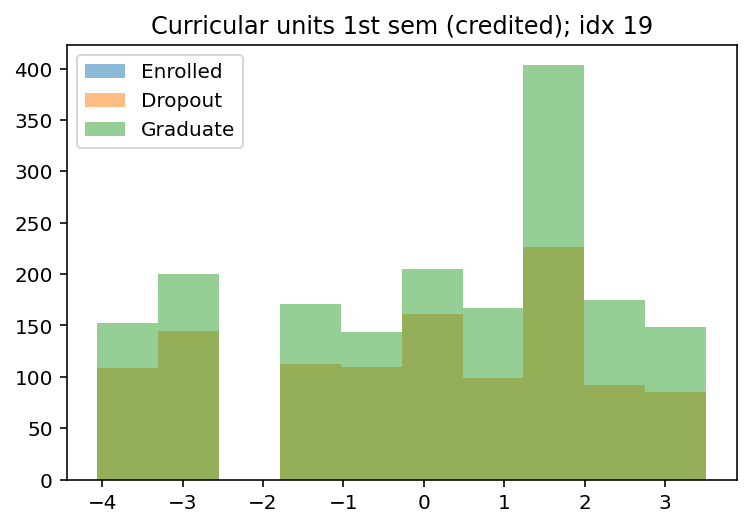

In [5]:
enrolled = y_tr =="Enrolled"
dropout = y_tr =="Dropout"
graduate = y_tr =="Graduate"

for index in range(len(X_tr[0])):
    plt.hist(X_tr[enrolled, index], alpha=0.5, label="Enrolled" ) # enrolled
    plt.hist(X_tr[dropout, index], alpha=0.5, label="Dropout" ) # dropout
    plt.hist(X_tr[graduate, index], alpha=0.5, label="Graduate") # graduate
    plt.title(dataset.columns[index] + '; idx ' + str(index))
    plt.legend()
    plt.show()

## Creating Models



In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.pipeline import Pipeline

### Log Reg  \+ PCA Model



In [7]:
# how many principal components kept after PCA
numComps = 11

# pipeline object for market data modeling
# --> onehot --> impute --> standardize --> PCA --> linear regression -->
pipe = Pipeline([('scaler', SS()),
                      ('PCA', PCA(svd_solver='arpack', n_components = numComps)),
#                       ('TSNE', TSNE(n_components = numComps, init = 'random', learning_rate = 'auto'))
                ])

# train each object within pipeline
# X_tr_PCA, y_tr_PCA = pipe.fit(X_tr, y_tr)
X_tr_PCA = pipe.fit_transform(X_tr)
X_te_PCA = pipe.fit_transform(X_te)

In [8]:
# Import tools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as CMD
from sklearn.linear_model import LogisticRegression as logreg

In [9]:
y_tr = y_tr.reshape(-1, 1).ravel()
# create and train a balanced log reg classifier with scaled training data
logRegModel = logreg().fit(X_tr_PCA, y_tr)
print(logRegModel.score(X_tr_PCA, y_tr))

0.881198347107438


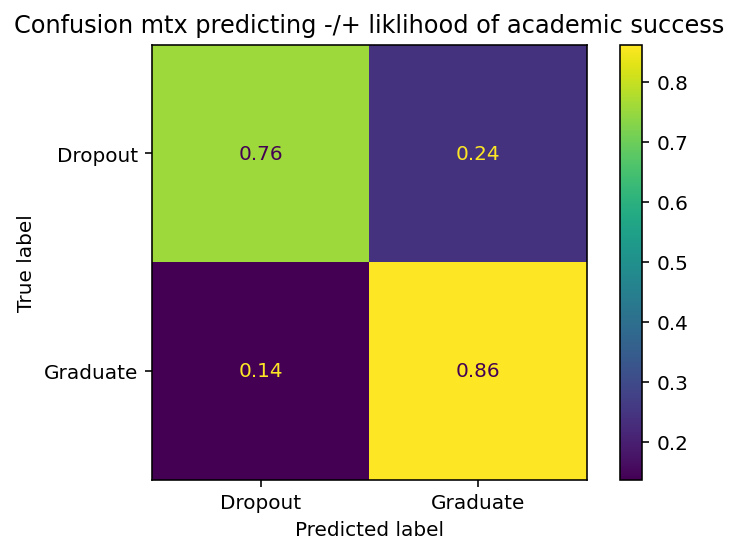

[[213  69]
 [ 61 383]]


In [10]:
# our model's predictions on all test data
y_te_pred = logRegModel.predict(X_te_PCA)

# confusion matrix creation and display using test data labels and predicted labels
cMtx = confusion_matrix(y_te, y_te_pred)
cMtxDisp = CMD(confusion_matrix = cMtx)
cMtxDisp.from_predictions(y_te, y_te_pred, normalize = 'true')

plt.title('Confusion mtx predicting -/+ liklihood of academic success')
plt.show()
print(cMtx)

### KNN Model



In [11]:
# Import Tools
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score as CVS
import numpy as np

In [12]:
# Create knn pipeline with X_tr_PCA
knn_sel = Pipeline([('std scaler', SS()),
                    ('knn', KNN())]).fit(X_tr_PCA, y_tr)

In [13]:
# Create knn pipeline with X_tr
knn = Pipeline([('std scaler', SS()),
                    ('knn', KNN())]).fit(X_tr, y_tr)

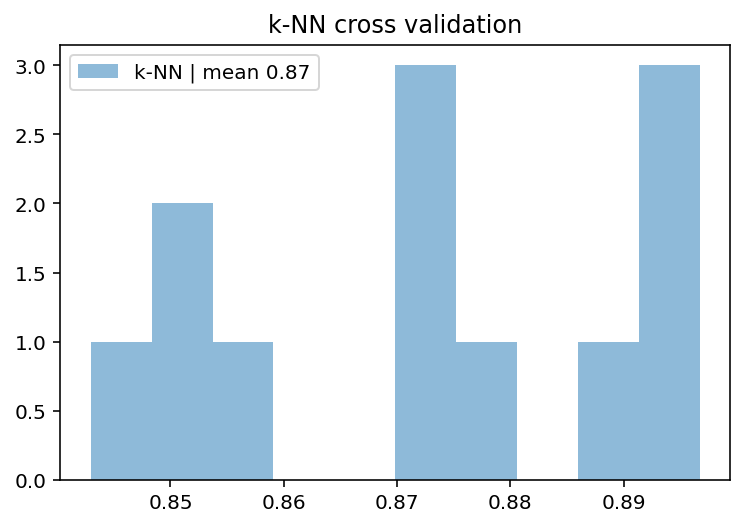

In [14]:
# Making a cross validation object. Must supply the pipeline, training data (with labels), and how many phases/steps in the cross validation process.
knn_cv_scores = CVS(knn_sel, X_tr_PCA, y_tr, cv = 12)
knn_scores = CVS(knn, X_tr, y_tr, cv = 12)

plt.hist(knn_cv_scores, label = 'k-NN | mean ' + str(np.around(knn_cv_scores.mean(), 2)), alpha = 0.5)
plt.legend()
plt.title('k-NN cross validation')
plt.show()

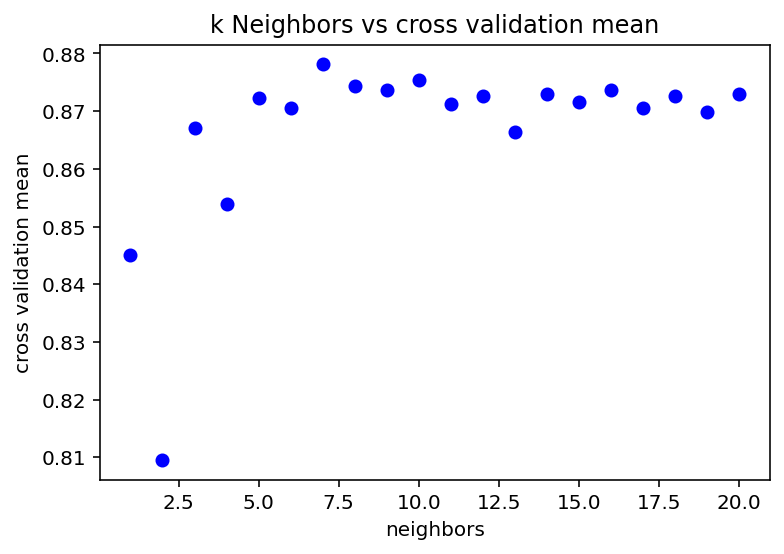

In [15]:
# determines best value of number of neighbors in knn model
# examines neighbors = 1, 2, ..., 20
max_neighbors = 20
# 30-fold cross validation
k_folds = 10

# cross validation for each neighbor value
# plot resulting point in (neighbor, mean validation score)-space
for neighbors in range(1, max_neighbors + 1):
#     knn_sel = Pipeline([('std scaler', SS()),
#                         ('knn', KNN(n_neighbors = neighbors))]).fit(X_tr_PCA, y_tr)

    knn = Pipeline([('std scaler', SS()),
                      ('PCA', PCA(svd_solver='arpack', n_components = 11)),
                        ('knn', KNN(n_neighbors = neighbors))]).fit(X_tr, y_tr)

#     knn_cv_mean = CVS(knn_sel, X_tr_PCA, y_tr, cv = k_folds).mean()
    knn_mean = CVS(knn, X_tr, y_tr, cv = k_folds).mean()

    plt.scatter(neighbors, knn_mean, color = 'blue')

plt.title('k Neighbors vs cross validation mean')
plt.xlabel('neighbors')
plt.ylabel('cross validation mean')
plt.show()

#### KNN Cross Val Score



In [16]:
# Import tools
from sklearn.model_selection import cross_val_score
import numpy as np
# train model with cv of 5
cv_scores = cross_val_score(knn, X, y, cv=5)
#print each cv score (accuracy) and average them
# pca n_comp 10 score : 0.8584022038567494
# pca n_comp 15 score : 0.8608815426997245
# pca n_comp 20 score : 0.8644628099173554
# pca n_comp 25 score : 0.8611570247933885
# --- k folds -----
# k-folds 30 -> 5 no change

print(cv_scores)
print("KNN cv_scores mean:{}".format(np.mean(cv_scores)))

[0.87603306 0.88567493 0.86914601 0.88016529 0.85950413]
KNN cv_scores mean:0.8741046831955923


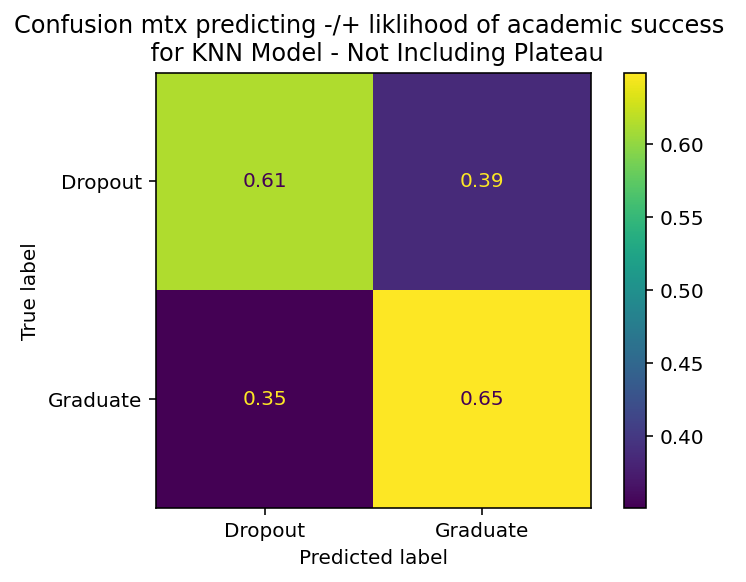

KNN cv_scores mean:0.8741046831955923


In [17]:
# confusion matrix creation and display using test data labels and predicted labels
y_te_pred = knn.predict(Xs_te)
cMtx = confusion_matrix(y_te, y_te_pred)
cMtxDisp = CMD(confusion_matrix = cMtx)
cMtxDisp.from_predictions(y_te, y_te_pred, normalize = 'true')

plt.title('Confusion mtx predicting -/+ liklihood of academic success \n for KNN Model - Not Including Plateau')
plt.show()
print("KNN cv_scores mean:{}".format(np.mean(cv_scores)))

#### Logistic Regression Cross Val Score



In [18]:
# create and train a balanced log reg classifier with scaled training data
logRegModel = logreg(class_weight={'Dropout':7,'Graduate':3}, solver = 'sag', max_iter = 20000).fit(SS().fit_transform(X_tr), y_tr)
logRegModel.score(Xs_te, y_te)

0.90633608815427

In [19]:
#train model with cv of 5
cv_scores_logreg = cross_val_score(logRegModel, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores_logreg)
print("Log Reg cv_scores mean:{}".format(np.mean(cv_scores_logreg)))

[0.89944904 0.88567493 0.89118457 0.89944904 0.89807163]
Log Reg cv_scores mean:0.8947658402203856


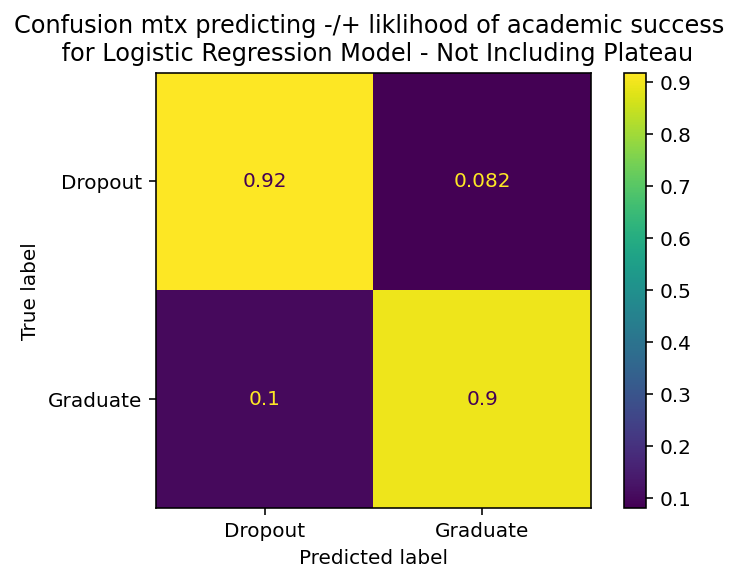

Log Reg cv_scores mean:0.8947658402203856


In [20]:
# confusion matrix creation and display using test data labels and predicted labels
y_te_pred = logRegModel.predict(Xs_te)
cMtx = confusion_matrix(y_te, y_te_pred)
cMtxDisp = CMD(confusion_matrix = cMtx)
cMtxDisp.from_predictions(y_te, y_te_pred, normalize = 'true')

plt.title('Confusion mtx predicting -/+ liklihood of academic success \n for Logistic Regression Model - Not Including Plateau')
plt.show()
print("Log Reg cv_scores mean:{}".format(np.mean(cv_scores_logreg)))

### Support Vector Machine Cross Val Score



In [21]:
# Import tools
from sklearn.svm import SVC

# Create svm model
svm_model = SVC(class_weight={'Dropout':7,'Graduate':3}).fit(SS().fit_transform(X_tr), y_tr)
print('score: ', svm_model.score(Xs_te, y_te))

#train model with cv of 5
cv_scores_svm = cross_val_score(svm_model, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores_svm)
print("SVM cv_scores_svm mean:{}".format(np.mean(cv_scores_svm)))

# JUST SVM
# score:  0.8842975206611571
# cv_scores_svm mean:0.8881542699724518

# SVM + STD Scaler
# score:  0.9201101928374655
# cv_scores_svm mean:0.9085399449035814

score:  0.9228650137741047


[0.88980716 0.87465565 0.8815427  0.89256198 0.88842975]
SVM cv_scores_svm mean:0.8853994490358128


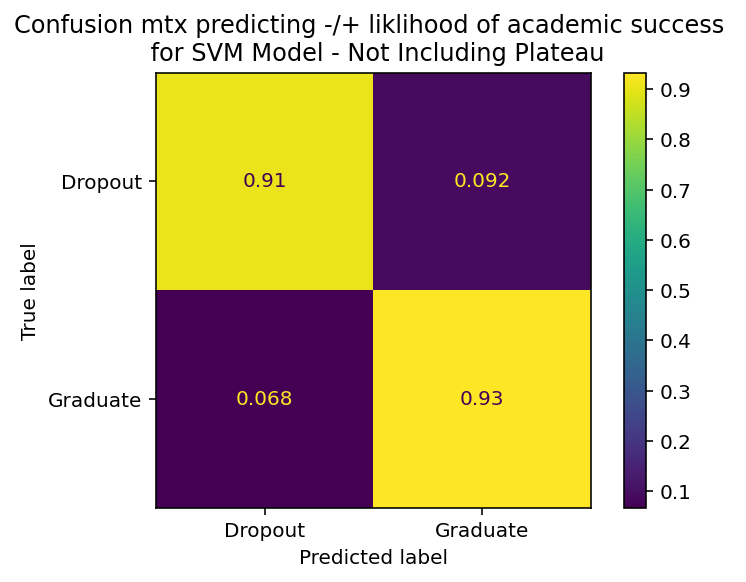

SVM cv_scores mean:0.8853994490358128


In [22]:
# confusion matrix creation and display using test data labels and predicted labels
# confusion matrix creation and display using test data labels and predicted labels
y_te_pred = svm_model.predict(Xs_te)
cMtx = confusion_matrix(y_te, y_te_pred)
cMtxDisp = CMD(confusion_matrix = cMtx)
cMtxDisp.from_predictions(y_te, y_te_pred, normalize = 'true')

plt.title('Confusion mtx predicting -/+ liklihood of academic success \n for SVM Model - Not Including Plateau')
plt.show()
print("SVM cv_scores mean:{}".format(np.mean(cv_scores_svm)))

### Decision Tree Classifier



In [23]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier as DTC

In [24]:
# create and train a balanced log reg classifier with scaled training data
dtcModel = DTC(max_depth = 7, class_weight={'Dropout':7,'Graduate':3}).fit(SS().fit_transform(X_tr), y_tr)
print("Score: ", dtcModel.score(Xs_te, y_te))
#train model with cv of 5
cv_scores_dtcModel = cross_val_score(dtcModel, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores_dtcModel)
print("cv_scores_dtcModel mean:{}".format(np.mean(cv_scores_dtcModel)))

Score:  0.8760330578512396
[0.87603306 0.86501377 0.86501377 0.8815427  0.88016529]
cv_scores_dtcModel mean:0.8735537190082644


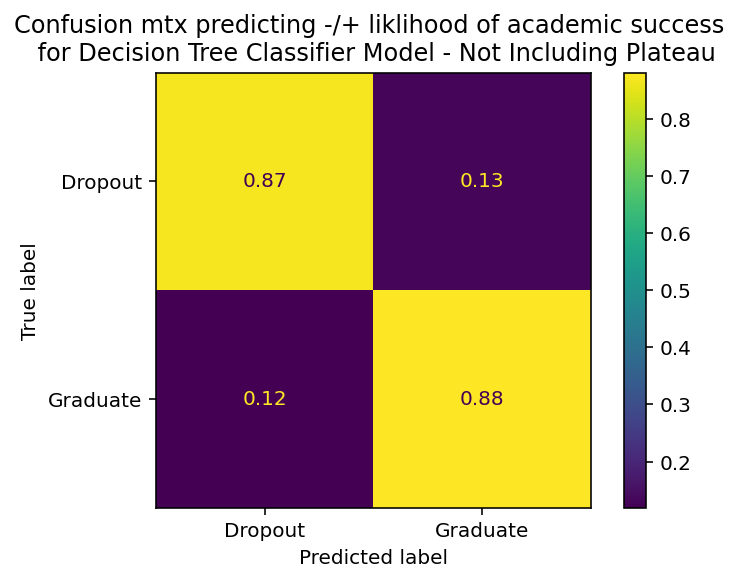

Decision Tree cv_scores mean:0.8735537190082644


In [25]:
# confusion matrix creation and display using test data labels and predicted labels
y_te_pred = dtcModel.predict(Xs_te)
cMtx = confusion_matrix(y_te, y_te_pred)
cMtxDisp = CMD(confusion_matrix = cMtx)
cMtxDisp.from_predictions(y_te, y_te_pred, normalize = 'true')

plt.title('Confusion mtx predicting -/+ liklihood of academic success \n for Decision Tree Classifier Model - Not Including Plateau')
plt.show()
print("Decision Tree cv_scores mean:{}".format(np.mean(cv_scores_dtcModel)))

### Random Forest Classifier



In [26]:
# Random Forest
# classifier models
from sklearn.ensemble import RandomForestClassifier as RFC

In [27]:
# create and train a balanced log reg classifier with scaled training data
rfcModel = RFC(n_estimators = 200, class_weight={'Dropout':7,'Graduate':3}).fit(SS().fit_transform(X_tr), y_tr)
print("Score: ", rfcModel.score(Xs_te, y_te))
#train model with cv of 5
cv_scores_rfcModel = cross_val_score(rfcModel, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores_rfcModel)
print("cv_scores_rfcModel mean:{}".format(np.mean(cv_scores_rfcModel)))

Score:  0.9090909090909091


[0.9077135  0.90358127 0.90909091 0.89807163 0.90633609]
cv_scores_rfcModel mean:0.9049586776859504


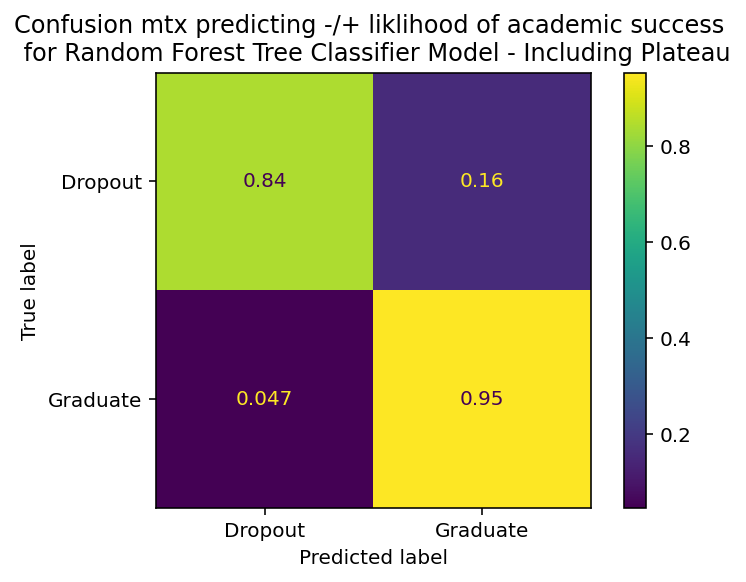

Random Forest cv_scores mean:0.9049586776859504


In [28]:
# confusion matrix creation and display using test data labels and predicted labels
y_te_pred = rfcModel.predict(Xs_te)
cMtx = confusion_matrix(y_te, y_te_pred)
cMtxDisp = CMD(confusion_matrix = cMtx)
cMtxDisp.from_predictions(y_te, y_te_pred, normalize = 'true')

plt.title('Confusion mtx predicting -/+ liklihood of academic success \n for Random Forest Tree Classifier Model - Including Plateau')
plt.show()
print("Random Forest cv_scores mean:{}".format(np.mean(cv_scores_rfcModel)))

### Neural Networks



In [29]:
# Multilayer network classifiers
# feedforward network layer -> layer -> ...
from keras.models import Sequential
# types of layers to place into network
from keras.layers.core import Dense, Flatten

2023-02-28 15:04:45.567735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-02-28 15:04:46.632398: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-28 15:04:46.635444: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-28 15:04:46.635461: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2023-02-28 15:04:53.687200: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-28 15:04:53.687947: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-28 15:04:53.687960: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


KeyboardInterrupt: 

In [ ]:
# One hot encode y values so they can be used in the network models
y_tr_df = pd.DataFrame(y_tr, columns = ['Target'])
y_te_df = pd.DataFrame(y_te, columns = ['Target'])

one_hot_y_tr = pd.get_dummies(y_tr_df[['Target']], drop_first = True) # Makes 1 dim
one_hot_y_te = pd.get_dummies(y_te_df[['Target']], drop_first = True)

X_tr_1, X_va, y_tr_1, y_va = tts(X_tr, one_hot_y_tr)

##### Multi\-Layer Network Cross Validation Function



In [ ]:
# Mlm model cross validation function
def mln_model_cross_val(X_tr, one_hot_y_tr):
    accuracy_sum = 0
    # Create loop for 5 iterations
    for idx in range(5):
        # split data into training sample and validation set
        X_tr_1, X_va, y_tr_1, y_va = tts(X_tr, one_hot_y_tr)

        # create network object
        MLNmodel = Sequential([
            Dense(100, activation = 'relu', input_shape = [12]),
            Dense(100, activation = 'relu'),
            Dense(1, activation = 'sigmoid')
            ])
        MLNmodel.compile(loss = 'binary_crossentropy',
                   optimizer = 'sgd',
                metrics = ["accuracy"])

        # Train network object on training sample
        network_history = MLNmodel.fit(X_tr_1, y_tr_1, epochs = 30, validation_data = (X_va, y_va))

        # Get accuracy on validation set
        accuracy = MLNmodel.evaluate(X_va, y_va, verbose=0)[1]
        accuracy_sum += accuracy

    # Return average
    average = accuracy_sum / 5
    print('average: ', average)
    return average, MLNmodel

In [ ]:
mln_cv_score, MLNmodel = mln_model_cross_val(X_tr, one_hot_y_tr)

##### Multilayer Network Confusion Matrix



In [ ]:
# confusion matrix creation and display using test data labels and predicted labels
y_te_pred = MLNmodel.predict(Xs_te)

# Convert probability to binary 0/1
# Make mask for if >= 0.5 -->1 else: 0
for idx in range(len(y_te_pred)):
    if(y_te_pred[idx] >= 0.5):
        y_te_pred[idx] = 1
    else:
        y_te_pred[idx] = 0

In [ ]:
# confusion matrix creation and display using test data labels and predicted labels
cMtx = confusion_matrix(one_hot_y_te, y_te_pred)
cMtxDisp = CMD(confusion_matrix = cMtx)
cMtxDisp.from_predictions(one_hot_y_te, y_te_pred, normalize = 'true')

plt.title('Confusion mtx predicting -/+ liklihood of academic success \n for ML Neural Network Classifier Model - Not Including Plateau')
plt.show()
print("MLN cv_scores mean:{}".format(mln_cv_score))

## Random Forest Feature Testing



In [ ]:
importances = rfcModel.feature_importances_
names = dataset.columns[:-1]
# print(names.array)
# Prints the names of all the features and values we want to drop.
mothersOccupationImportance = importances[names.get_loc("Mother's occupation")]
debtorImportance = importances[names.get_loc("Debtor")]


print('W/O PLATEAU')
for idx in range(len(importances)):
    if(importances[idx] < mothersOccupationImportance):
        print(names[idx])

print('\nW PLATEAU')
for idx in range(len(importances)):
    if(importances[idx] <= debtorImportance):
        print(names[idx])

In [ ]:
# features = iris['feature_names']
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#cca677', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Graphing Logistic Regression Coefficients



In [ ]:
coefs = logRegModel.coef_[0]
print(coefs)

In [ ]:
indices = np.argsort(coefs)

plt.figure(figsize=(10,8))
plt.title('Logistic Regression Model Coefficients')
plt.bar(range(len(indices)), sorted(coefs[indices]), color='#cca677', align='center')
plt.xticks(range(len(indices)), [names[i] for i in indices], rotation=45, ha='right')
# plt.xlabel('Relative Importance')
plt.ylabel('Coefficients')
plt.show()